<a href="https://colab.research.google.com/github/NguyenThanhDat10012004/AIO-EXERCISE/blob/module3%2Fweek1/data_visualizationipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris_X, iris_Y = datasets.load_iris(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_Y, test_size=0.2, random_state= 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred))



1.0


In [4]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [1]:
import numpy as np
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

imdb  = load_dataset("imdb")
imdb_train, imdb_test = imdb["train"], imdb["test"]

vectorizer = CountVectorizer(max_features= 1000)
X_train = vectorizer.fit_transform(imdb_train["text"]).toarray()
X_test = vectorizer.transform(imdb_test["text"]).toarray()
Y_train = np.array(imdb_train["label"])
Y_test = np.array(imdb_test["label"])

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


0.64444


In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

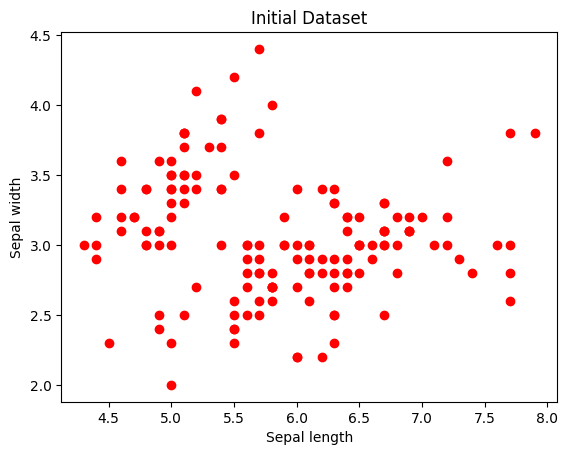

In [4]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c="red")
plt.title("Initial Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

In [8]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k                   # Số cụm
        self.max_iters = max_iters   # Số vòng lặp tối đa
        self.centroids = None        # Tọa độ tâm cụm
        self.clusters = None         # Cụm của từng điểm dữ liệu

    def initialize_centroids(self, data):
        """
        Khởi tạo ngẫu nhiên tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        """
        Tính khoảng cách Euclid giữa hai điểm dữ liệu
        Parameters:
            x1 (numpy.ndarray): điểm dữ liệu 1
            x2 (numpy.ndarray): điểm dữ liệu 2
        Return:
            float: khoảng cách Euclid
        """
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        """
        Phân cụm dữ liệu
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa cluster của từng điểm dữ liệu
        """

        # Tính toán khoảng cách giữa mỗi điểm dữ liệu (data point) và tâm (centroids) bằng cách sử dụng hàm euclidean_distance
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        # print(np.argmin(distances, axis=1)) # Có thể in ra dòng này để thấy cách biểu diễn mảng chứa allocation
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        """
        Cập nhật tâm cụm
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            numpy.ndarray: mảng chứa tâm cụm mới
        """
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        """
        Hàm huấn luyện
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        # Gọi tới phương thức khởi tạo ngẫu nhiên tâm cụm
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            # Gán cụm cho các data point gần nhất
            self.clusters = self.assign_clusters(data)

            # Visualize các cụm và tâm cụm tại iteration này
            self.plot_clusters(data, i)

            # Dựa vào các data point của từng cụm, dịch chuyển tâm cụm tới vị trí trung tâm (tính mean) của cụm
            new_centroids = self.update_centroids(data)

            # Nếu tâm cụm không di chuyển, dừng lại
            if np.all(self.centroids == new_centroids):
                break

            # Nếu tâm cụm có di chuyển, thực hiện lại vòng lặp với các giá trị tâm cụm mới
            self.centroids = new_centroids

        # Plot kết quả cuối cùng của các cụm, tâm cụm
        self.plot_final_clusters(data)
        return self.centroids


    def plot_clusters(self, data, iteration):
        """
        Vẽ các cụm và tâm cụm tại mỗi iteration
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
            iteration (int): iteration hiện tại
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        """
        Vẽ các cụm và tâm cụm cuối cùng
        Parameters:
            data (numpy.ndarray): dữ liệu đầu vào cần phân cụm
        Return:
            None
        """
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

In [6]:
data = data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

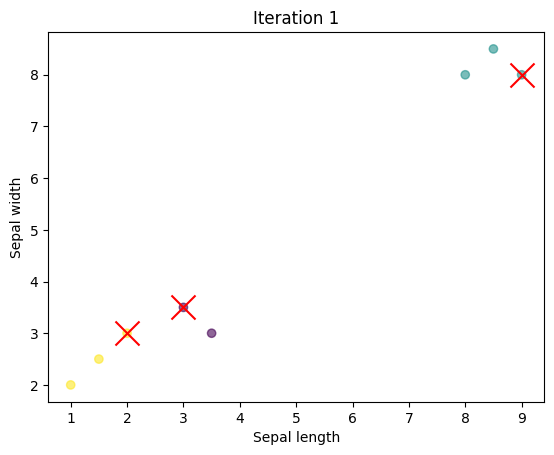

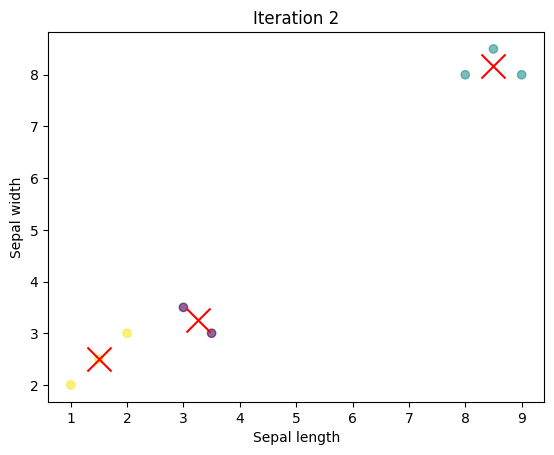

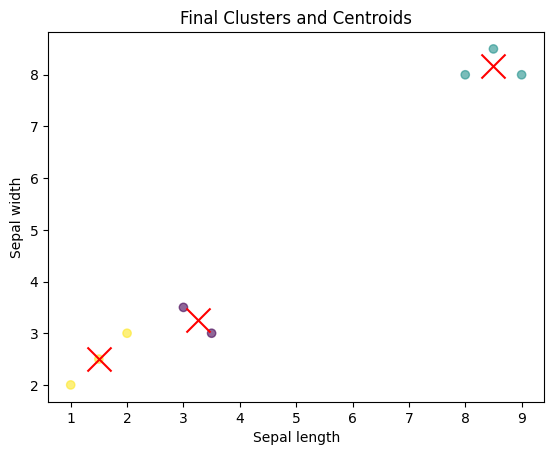

array([[3.25      , 3.25      , 2.25      ],
       [8.5       , 8.16666667, 8.        ],
       [1.5       , 2.5       , 1.33333333]])

In [9]:
kmeans = KMeans(k=3)
kmeans.fit(data)